# Using BASpy to read in climate model data (CMIP5) into Xarray 

For this notebook to work you will need to install:
- [BASpy](https://github.com/scotthosking/baspy) (for getting data)
- [Xarray](http://xarray.pydata.org/en/stable/installing.html) (for processing data)
- [Cartopy](https://scitools.org.uk/cartopy/docs/latest/installing.html#installing) (for plotting maps)

In [1]:
import baspy as bp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

%matplotlib inline 

# Using BASpy
### Define the CMIP5 data we want to work with

In [2]:
catlg = bp.catalogue(dataset='cmip5', Experiment='historical', 
                         Frequency='mon', Var='tas', 
                         Model='HadGEM2-ES')
catlg.drop(columns=['Path','DataFiles'])

Updating cached catalogue...
catalogue memory usage (MB): 28.786099
>> Current cached values (can be extended by specifying additional values or by setting read_everything=True) <<
{'Experiment': ['piControl', 'rcp85', 'historical', 'rcp26', 'rcp45'], 'Frequency': ['mon']}



Centre       Model  Experiment Frequency SubModel  CMOR   RunID  \
489465   MOHC  HadGEM2-ES  historical       mon    atmos  Amon  r2i1p1   
489511   MOHC  HadGEM2-ES  historical       mon    atmos  Amon  r4i1p1   
489557   MOHC  HadGEM2-ES  historical       mon    atmos  Amon  r3i1p1   
489605   MOHC  HadGEM2-ES  historical       mon    atmos  Amon  r1i1p1   

          Version  Var  StartDate  EndDate dataset  
489465  v20110418  tas     185912   200512   cmip5  
489511  v20110418  tas     185912   200511   cmip5  
489557  v20110418  tas     185912   200512   cmip5  
489605  v20120928  tas     185912   200511   cmip5

### Select one model run (one row)

In [3]:
row = catlg.iloc[3]
row

Centre                                                     MOHC
Model                                                HadGEM2-ES
Experiment                                           historical
Frequency                                                   mon
SubModel                                                  atmos
CMOR                                                       Amon
RunID                                                    r1i1p1
Version                                               v20120928
Var                                                         tas
StartDate                                                185912
EndDate                                                  200511
Path          /MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i...
DataFiles     tas_Amon_HadGEM2-ES_historical_r1i1p1_185912-1...
dataset                                                   cmip5
Name: 489605, dtype: object

# Using Xarray

At this point (if the data is stored on the system we are on) we can read in multiple files as a Dataset using:
ds = bp.open_dataset(row)

However, assuming you do not have access to the CMIP5 or CMIP6 data archive, you can download 
and get going with some CMIP6 sample data by running this line:

In [4]:
ds = bp.eg_Dataset()
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 420)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon        (lon) float64 0.625 1.875 3.125 4.375 5.625 6.875 8.125 9.375 ...
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 1980-02-15T12:00:00 ...
Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) datetime64[ns] ...
Attributes:
    title:                 NOAA GFDL GFDL-AM4 model output prepared for CMIP6...
    history:               File was processed by fremetar (GFDL analog of CMO...
    table_id:              Amon
    contact:               gfdl.climate.model.info@noaa.gov
    comment:               <null ref>
    tracking_id:           hdl:21.14100/3b95ceac-9bd6-42c9-a130-130fc1ba108c
    further_info_url:      https://furth

In [5]:
# read a DataArray (e.g., a single variable) from the Dataset
da = ds.tas
da

<xarray.DataArray 'tas' (time: 420, lat: 180, lon: 288)>
[21772800 values with dtype=float32]
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float64 0.625 1.875 3.125 4.375 5.625 6.875 8.125 9.375 ...
  * time     (time) datetime64[ns] 1980-01-16T12:00:00 1980-02-15T12:00:00 ...
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

# Plotting

shape = (420, 180, 288) 



(array([  69415.,  442264.,  428669., 1430675., 1719399., 1709979.,
        4552300., 4731607., 6553416.,  135076.]),
 array([198.42273, 210.32277, 222.22281, 234.12283, 246.02287, 257.9229 ,
        269.82294, 281.723  , 293.62302, 305.52307, 317.4231 ],
       dtype=float32),
 <a list of 10 Patch objects>)

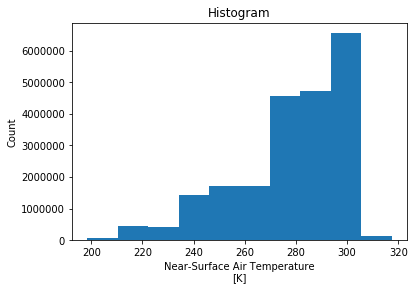

In [6]:
print('shape =', da.shape, '\n')

da.plot()

### Plot map for first time index

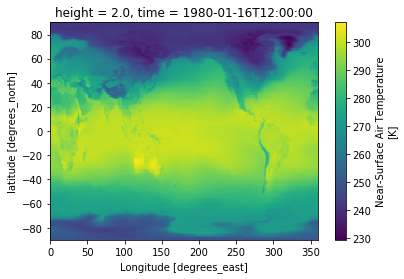

In [7]:
da.isel(time=0).plot()

### Plot using a polarstereo map projection

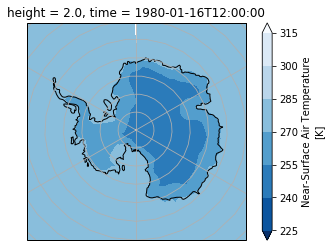

In [8]:
crs = ccrs.SouthPolarStereo(central_longitude=0.0)
ax = plt.subplot(projection=crs)
ax.set_extent([-180,180,-90,-60], ccrs.PlateCarree() )
ax.gridlines(ylocs=range(-90,-30,5))
da.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.cm.Blues_r, extend='both')
ax.coastlines('110m', color='k')